In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from data_cleaner import *
from room_energy import energyLossAllRooms, energy_to_building

In [2]:
df_fcu_sth_raw = pd.read_csv('data/Gnd floor FCU Sth 16032020.csv')
df_fcu_nth_raw = pd.read_csv('data/Gnd floor FCU North 16032020.csv')
df_ahu_raw = pd.read_csv('data/Gnd AHU multi list 16032020.csv')
df_chiller_boiler_raw = pd.read_csv('data/more_Data/chillers boilers thermal Feb 23032020.csv')
room_info_raw = pd.read_csv('data/Room Details.csv')
df_ltb_space_raw = pd.read_csv('data/LTB Space Data.csv')

In [3]:
df_ltb_temps = create_temp_df(df_fcu_sth_raw, df_fcu_nth_raw, df_ahu_raw)
df_chiller_boiler_power = create_chiller_boiler_power_df(df_chiller_boiler_raw)
df_room_info = create_room_info_df(room_info_raw)

In [4]:
df_energy_room_change = energyLossAllRooms(df_ltb_temps, df_room_info, time_frame=["08:00", "16:00"])
df_energy_external = energy_to_building(df_ltb_temps, df_room_info, time_frame=["08:00", "16:00"])

# Plotting results

#### Single Day Temperature results

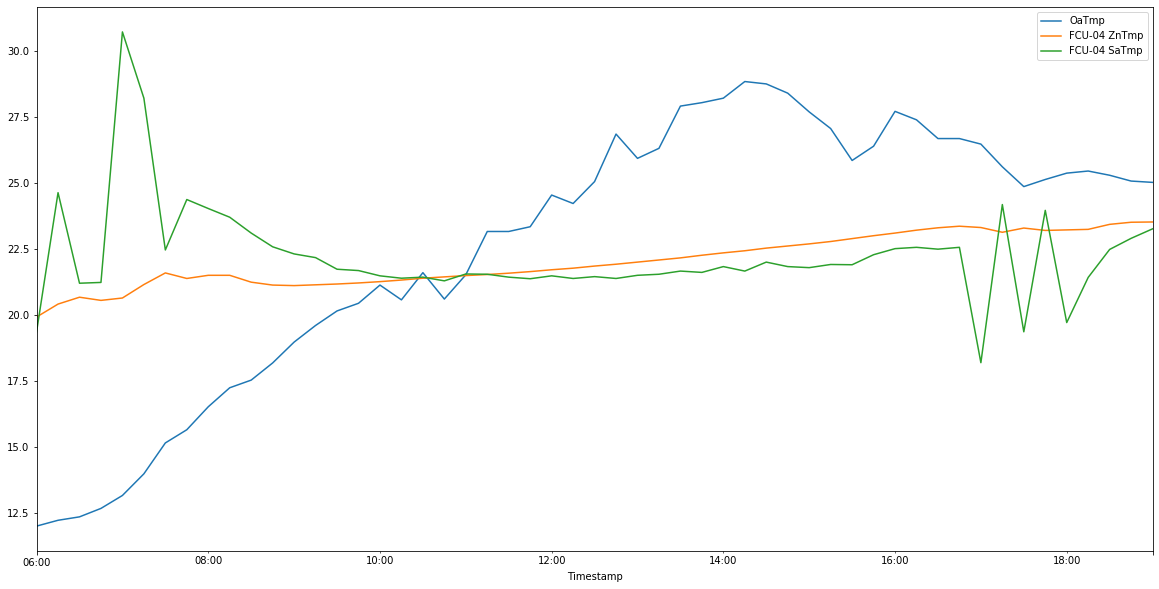

In [18]:
START_DATE = '2020-02-06 01:10:0'  
END_DATE = '2020-02-06 23:59:59'
df_ltb_temps_day = create_temp_df(df_fcu_sth_raw, df_fcu_nth_raw, df_ahu_raw, START_DATE, END_DATE)

time_frame = ["06:00", "19:00"]
zn_tmp = 'FCU-04 ZnTmp'
sa_tmp = 'FCU-04 SaTmp'
df_ltb_temps_day = df_ltb_temps_day.between_time(time_frame[0], time_frame[1])
delta_temp = df_ltb_temps_day['OaTmp'] - df_ltb_temps_day[zn_tmp]
 
# Get current axis
fig= plt.figure(figsize=(20,10))
ax = plt.gca()

df_ltb_temps_day['OaTmp'].plot(kind='line', ax=ax, legend=True)
df_ltb_temps_day[zn_tmp].plot(kind='line', ax=ax, legend=True)
df_ltb_temps_day[sa_tmp].plot(kind='line', ax=ax, legend=True)
#delta_temp.plot(kind='line', ax=ax, legend=True)

plt.show()

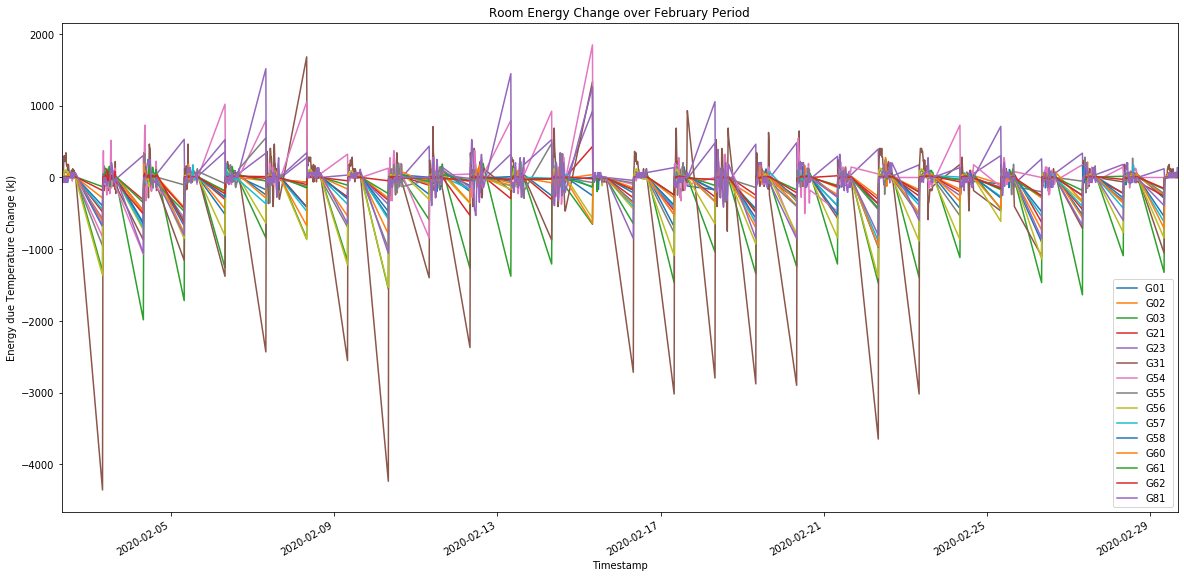

In [32]:
 # Get current axis
fig= plt.figure(figsize=(20,10))
ax = plt.gca()
ax.set_title("Room Energy Change over February Period")
ax.set_ylabel("Energy due Temperature Change (kJ)")
for col in df_energy_room_change.columns:
    df_energy_room_change[col].plot(kind='line', ax=ax, legend=True)

plt.legend(loc="lower right")
plt.show()

In [ ]:
 # Get current axis
fig= plt.figure(figsize=(20,10))
ax = plt.gca()
ax.set_title("Energy Exchange with Outside over February Period")
ax.set_ylabel("Energy Change Externally (kJ)")
for col in df_energy_external.columns:
    df_energy_external[col].plot(kind='line', ax=ax, legend=True)
    
plt.legend(loc="lower right")
plt.show()

Assuming change in room energy = incoming energy from outside - reduction of energy from AC

-> reduction of energy from AC = incoming - change in room 

In [20]:
reduction = df_energy_external - df_energy_room_change
reduction.iloc[:2]



,G01,G02,G03,G21,G23,G31,G54,G55,G56,G57,G58,G60,G61,G62,G81
Timestamp,,,,,,,,,,,,,,,
2020-02-02 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-02 08:15:00,-611.472016,-328.428026,-1242.78462,6.013041,3.389216,-1843.96905,-0.0,-299.062381,-864.097565,-383.586066,-303.221126,-750.156783,-358.862703,-344.49624,-1558.65303


In [21]:
df_energy_external.iloc[:2]

,G01,G02,G03,G21,G23,G31,G54,G55,G56,G57,G58,G60,G61,G62,G81
Timestamp,,,,,,,,,,,,,,,
2020-02-02 08:00:00,-643.003515,-350.029350,-1300.882275,-0.0,-0.0,-1940.798475,-0.0,-304.321050,-878.681925,-394.895655,-309.733875,-757.79550,-369.51552,-359.25120,-1644.416235
2020-02-02 08:15:00,-615.097395,-334.993725,-1242.784620,-0.0,-0.0,-1843.969050,-0.0,-291.691125,-846.204975,-377.213760,-297.103950,-729.16767,-355.40208,-344.49624,-1558.653030


In [22]:
df_energy_room_change.iloc[:2]

,G01,G02,G03,G21,G23,G31,G54,G55,G56,G57,G58,G60,G61,G62,G81
Timestamp,,,,,,,,,,,,,,,
2020-02-02 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-02 08:15:00,-3.625379,-6.565699,0.0,-6.013041,-3.389216,0.0,0.0,7.371256,17.89259,6.372306,6.117176,20.989113,3.460623,0.0,0.0


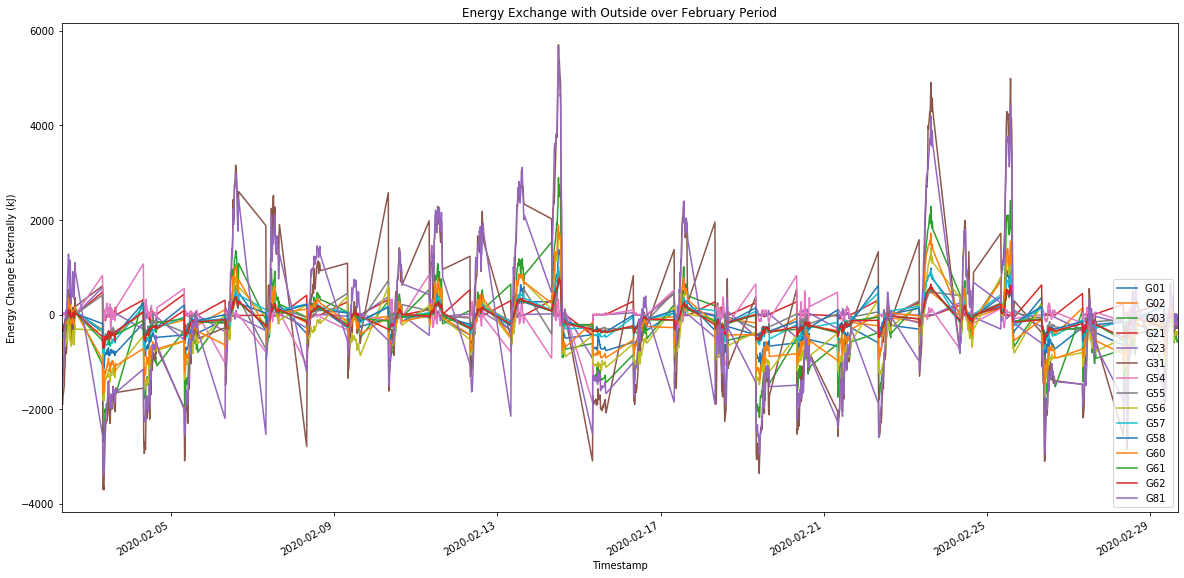

In [23]:
 # Get current axis
fig= plt.figure(figsize=(20,10))
ax = plt.gca()
ax.set_title("Energy Exchange with Outside over February Period")
ax.set_ylabel("Energy Change Externally (kJ)")
for col in reduction.columns:
    reduction[col].plot(kind='line', ax=ax, legend=True)
    
plt.legend(loc="lower right")
plt.show()

In [72]:
ac_energy_work = reduction.abs().sum().sum()

In [73]:
chiller_energy, boiler_energy = get_power_used(df_chiller_boiler_power)
total_ac_energy_used = chiller_energy + boiler_energy

ac_floor_area = df_room_info['Total Area'].sum()
ltb_foor_area = df_ltb_space_raw['Room Area'].sum()
gnd_floor_area = df_ltb_space_raw[df_ltb_space_raw['Floor'] == '01']['Room Area'].sum()

ac_area_multiplier = ltb_foor_area / ac_floor_area
building_ac_energy_work = ac_area_multiplier * ac_energy_work


In [74]:
BTU = building_ac_energy_work/ 1.055
total_ac_wh = total_ac_energy_used/ 3.6  # kJ to Wh

In [75]:
SEER = BTU/total_ac_wh

In [76]:
SEER

0.35022251490112455